# Random points classification (Tensorflow)

#### Imports

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#### Data load and visualization

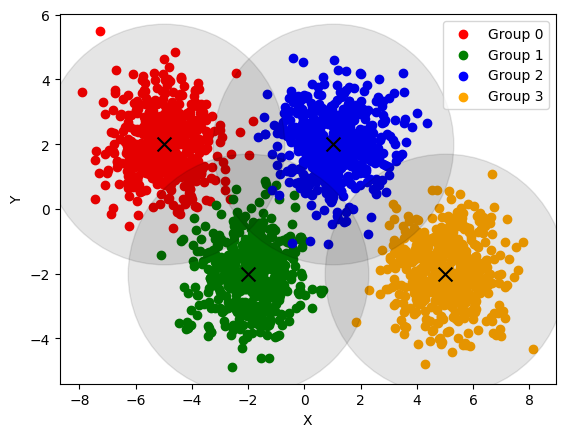

In [30]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

colors = ['red', 'green', 'blue', 'orange']

for i in range(len(colors)):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], 
                c=colors[i], label=f'Group {i}')

x_centers = [c[0] for c in centers]
y_centers = [c[1] for c in centers]
plt.scatter(x_centers, y_centers, s=30000, c='black', alpha=.1)
plt.scatter(x_centers, y_centers, s=100, c='black', marker='x')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

#### Create a Sequential neural network model

In [31]:
model = Sequential([
    Dense(units=16, activation="relu"),
    Dense(units=12, activation="relu"),
    Dense(units=4, activation="linear"),
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.3710 - loss: 1.5099 
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.4175 - loss: 1.4075
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5315 - loss: 1.3143 
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6335 - loss: 1.2205  
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.6885 - loss: 1.1342
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.7050 - loss: 1.0555
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8170 - loss: 0.9828
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9550 - loss: 0.9145
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9570 - loss: 0.8460
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.9580 - loss: 0.7779
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9600 - loss: 0.7165
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step

#### Random points prediction

In [32]:
X_test = np.random.rand(2000, 2) * 20 - 10  # (max - min = 12, luego restamos 6)
logits = model.predict(X_test)

y_pred = np.argmax(logits, axis=1)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


array([0, 2, 2, ..., 2, 1, 2], shape=(2000,))

#### Visualize the random points prediction

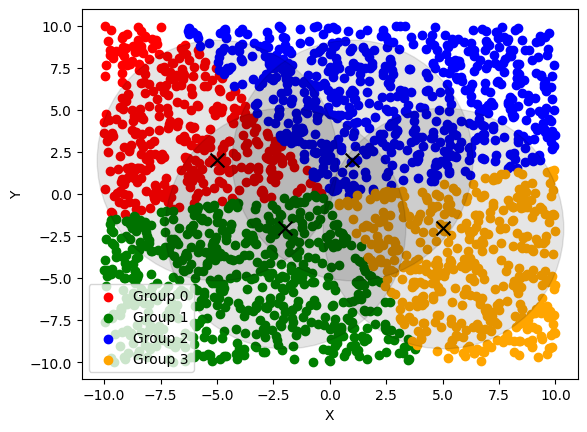

In [33]:
for i in range(len(colors)):
    plt.scatter(X_test[y_pred==i, 0], X_test[y_pred==i, 1], 
                c=colors[i], label=f'Group {i}')

x_centers = [c[0] for c in centers]
y_centers = [c[1] for c in centers]
plt.scatter(x_centers, y_centers, s=30000, c='black', alpha=.1)
plt.scatter(x_centers, y_centers, s=100, c='black', marker='x')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()